In [18]:
import pandas as pd

import numpy as np
import wrangle as wr
# ignore warnings
from datetime import date
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 

import matplotlib.pyplot as plt

In [2]:
df = wr.get_zillow_data()

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [4]:
df.shape

(2152863, 7)

In [5]:
# Checking for nulls 
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [9]:
# renaming columns
df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})


In [7]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [ ]:
df['bedroomcnt'] = df.bedroomcnt.astype(int)

In [ ]:
df.head()

In [ ]:
df['fips'] = df.fips.astype(int)

In [ ]:
 today = date.today()

In [ ]:
df.taxvaluedollarcnt.min()

In [13]:
# Notes 
df['age'] = 2021 - df.year_built

In [14]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,NaN
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,NaN
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,NaN
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,NaN
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,16.0


In [ ]:
del df['yearbuilt']

In [ ]:
df.head()

- rename columns
- managing null columns
- looking for outliers
- plot to determine 
- document proccess
- remove outlier function version 1/2

In [ ]:
df.info(null_counts=True)

In [10]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [11]:
# get total of null values for each row
df.isnull().sum()

bedrooms        11
bathrooms       11
area          8484
tax_value      493
year_built    9337
taxamount     4442
fips             0
dtype: int64

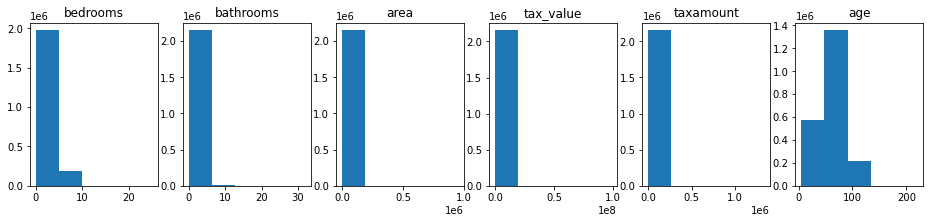

In [19]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()


<AxesSubplot:>

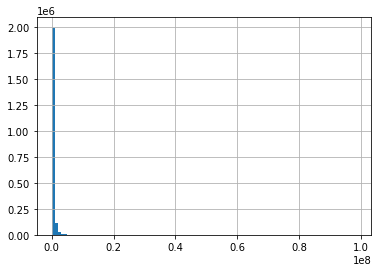

In [20]:
# Looking at tax_value in closer detail
df['tax_value'].hist(bins=100)

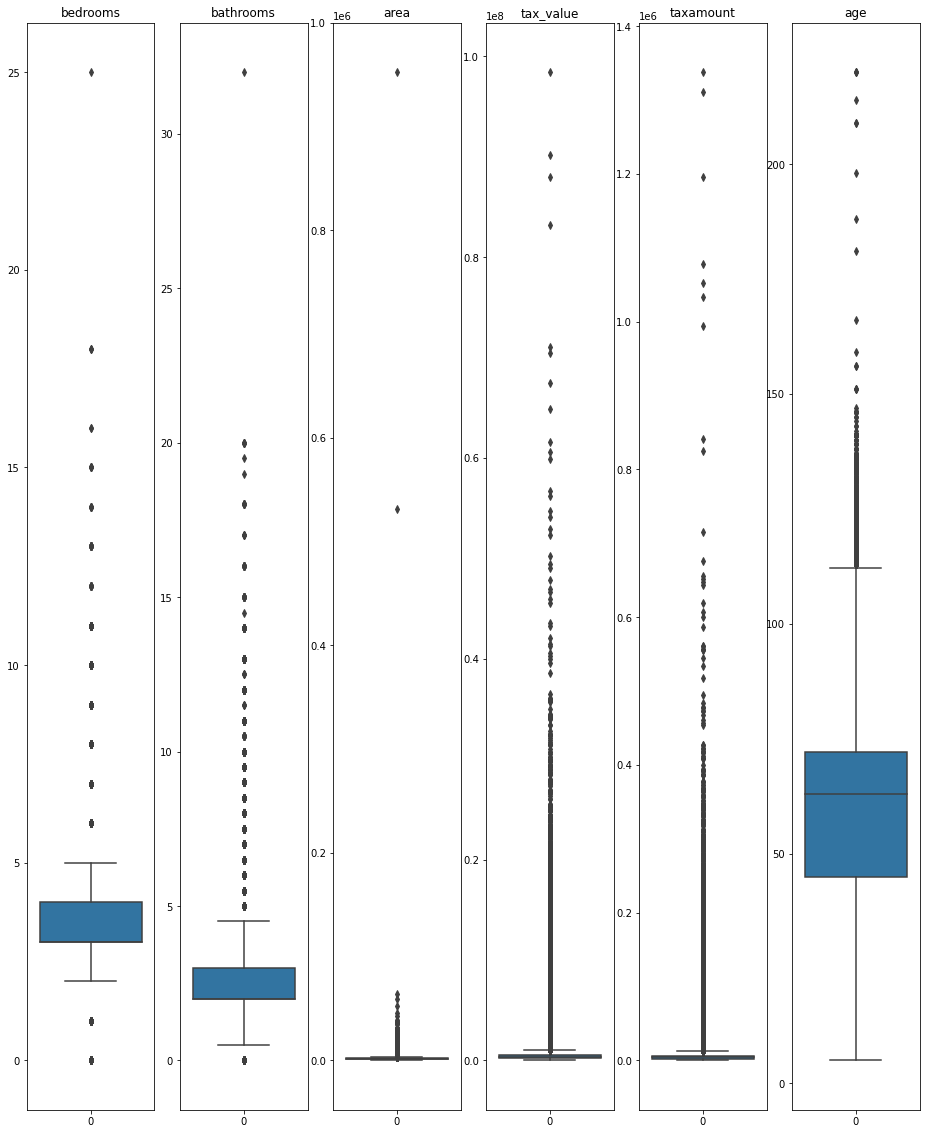

In [21]:
# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]
plt.figure(figsize=(16, 20))
for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    sns.boxplot(data=df[col])

    # Hide gridlines.
    plt.grid(False)

plt.show()

In [22]:
# Outliers
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
count,2.15285e+06,2.15285e+06,2.14438e+06,2.15237e+06,2.14353e+06,2.14842e+06,2.15286e+06,2.14353e+06
mean,3.2872,2.23069,1862.86,461896,1960.95,5634.87,6048.38,60.0503
std,0.954754,0.99928,1222.13,699676,22.1622,8178.91,20.4333,22.1622
min,0,0,1,1,1801,1.85,6037,5
25%,3,2,1257,188170,1949,2534.98,6037,45
50%,3,2,1623,327671,1958,4108.95,6037,63
75%,4,3,2208,534527,1976,6414.32,6059,72
max,25,32,952576,9.84289e+07,2016,1.33776e+06,6111,220


In [23]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


In [24]:
def remove_outliers_v2(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df.drop(columns=['outlier'], inplace=True)
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [25]:
df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
df

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,10.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,95.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0,71.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0,71.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0,70.0
...,...,...,...,...,...,...,...,...
2152852,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0,75.0
2152853,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0,66.0
2152855,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0,9.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0,6.0


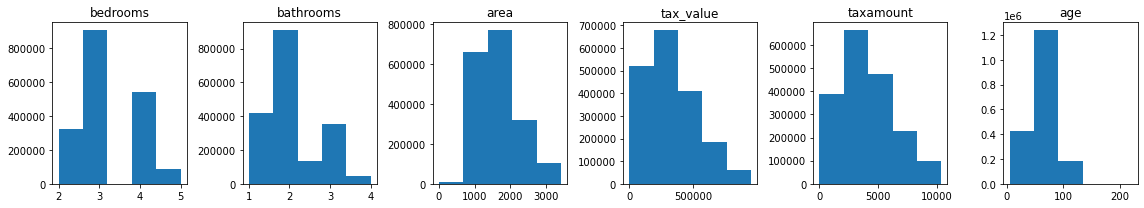

In [26]:
#Lets revisualize our data now that its be cleaned a bit (approximately 300,000 observations removed):

plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
    # mitigate overlap
    plt.tight_layout()
    
plt.show()